In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
telcom = pd.read_csv("IBM_sample_data.csv")

![變數](變數.png)

In [2]:
print(telcom.shape)
telcom.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan).astype(float)

In [5]:
nan_list = pd.DataFrame(telcom,columns=['customerID','tenure','Contract','MonthlyCharges','TotalCharges'])
nan_list = nan_list[pd.isnull(telcom['TotalCharges'])]

In [6]:
nan_list.head()
#tenure:使用期為零>推測可能是新顧客

,customerID,tenure,Contract,MonthlyCharges,TotalCharges
488,4472-LVYGI,0,Two year,52.55,NaN
753,3115-CZMZD,0,Two year,20.25,NaN
936,5709-LVOEQ,0,Two year,80.85,NaN
1082,4367-NUYAO,0,Two year,25.75,NaN
1340,1371-DWPAZ,0,Two year,56.05,NaN


In [7]:
telcom.dropna(inplace=True)
telcom.shape

(7032, 21)

In [8]:
churnvalue=telcom["Churn"].value_counts()
labels=telcom["Churn"].value_counts().index

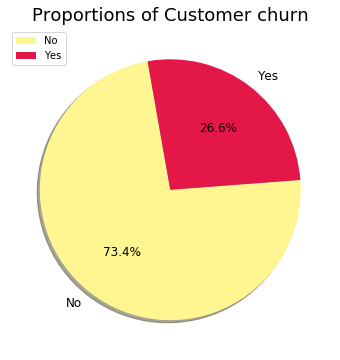

In [9]:
rcParams["figure.figsize"]=6,6
plt.pie(churnvalue,
        labels=labels,
        startangle=100,
        colors=["#fff591","#e41749"], 
        autopct='%.1f%%', 
        textprops = {"fontsize" : 12},
        shadow=True)
plt.title("Proportions of Customer churn",{"fontsize" : 18})
plt.legend(loc = "best") 
plt.show()

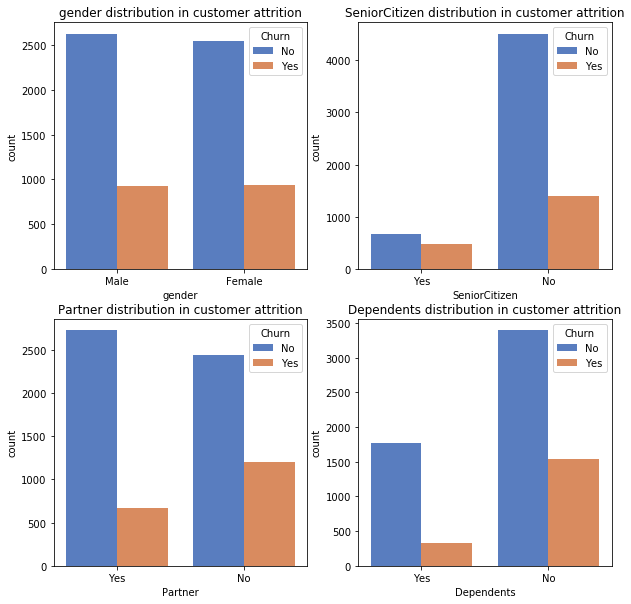

In [10]:
single_variables = ["gender", "SeniorCitizen", "Partner", "Dependents"] 
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})

f, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for i, item in enumerate(single_variables):
    plt.subplot(2,2,(i+1))
    if item == "gender":
        ax=sns.countplot(x=item,hue="Churn",data=telcom,palette="muted",order=['Male','Female'])
    else:
        ax=sns.countplot(x=item,hue="Churn",data=telcom,palette="muted",order=["Yes","No"])
    plt.xlabel(str(item))
    plt.title(str(item)+" distribution in customer attrition")
    i=i+1
plt.show()

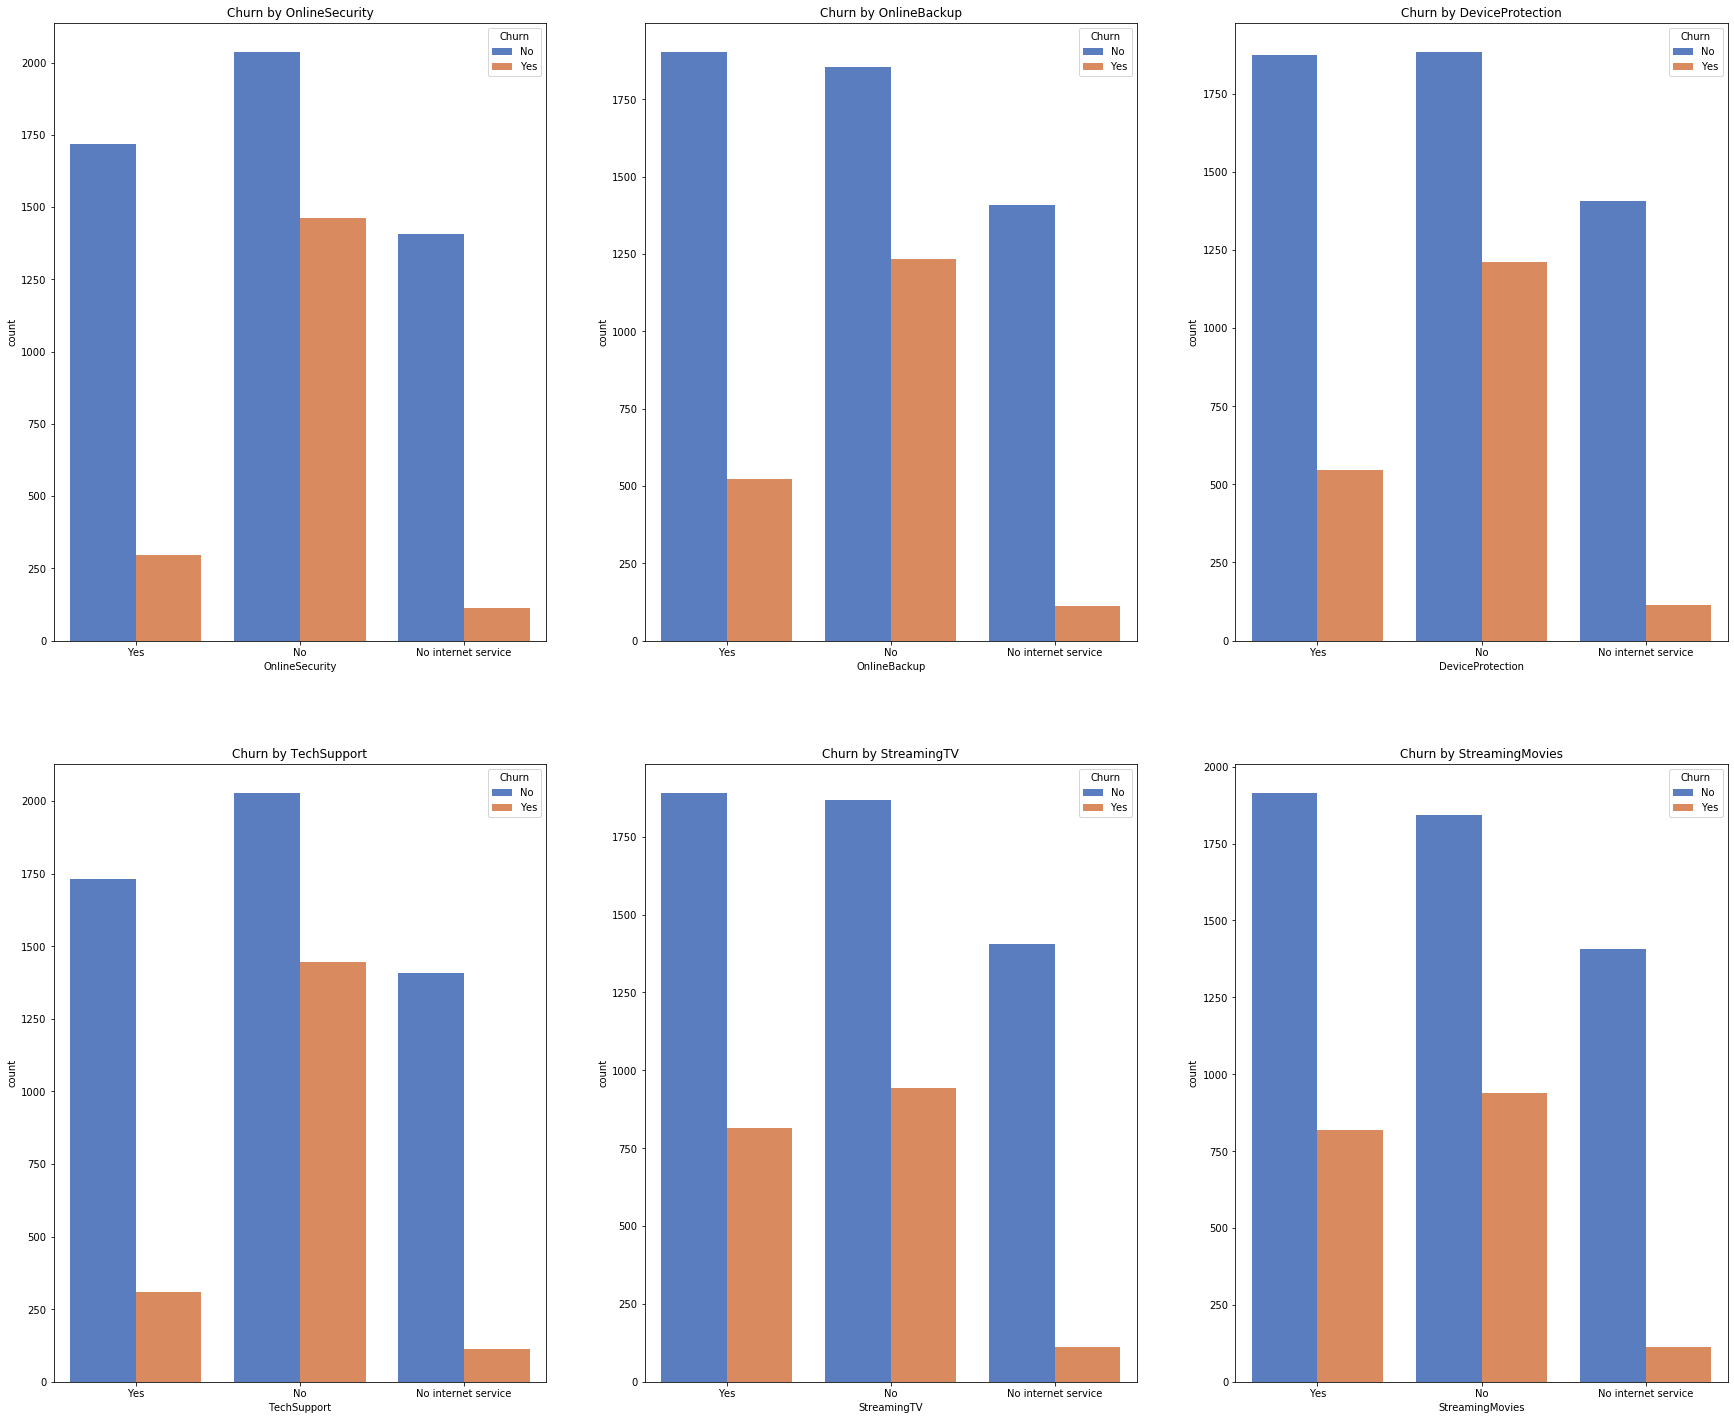

In [11]:
multiple_variables=["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(30,25))
for i, item in enumerate(multiple_variables):
    plt.subplot(2,3,(i+1))
    ax=sns.countplot(x=item,hue="Churn",data=telcom,palette="muted",order=["Yes","No","No internet service"])
    plt.xlabel(str(item))
    plt.title("Churn by "+ str(item))
    i=i+1
plt.show()

In [12]:
#使用網路電視和電影相關服務對於用戶流失影響不大

In [13]:
telcom['Churn'] = telcom.Churn.replace({'Yes': 1, 'No': 0})
telcom['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [14]:
tel_subject=telcom.iloc[:,1:20]
corr_Df = tel_subject.apply(lambda x: pd.factorize(x)[0])
corr_Df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,2,2
3,1,0,1,0,3,0,0,0,1,1,1,1,0,0,1,1,2,3,3
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,4,4


Text(0.5, 1, 'Correlation Matrix for variables')

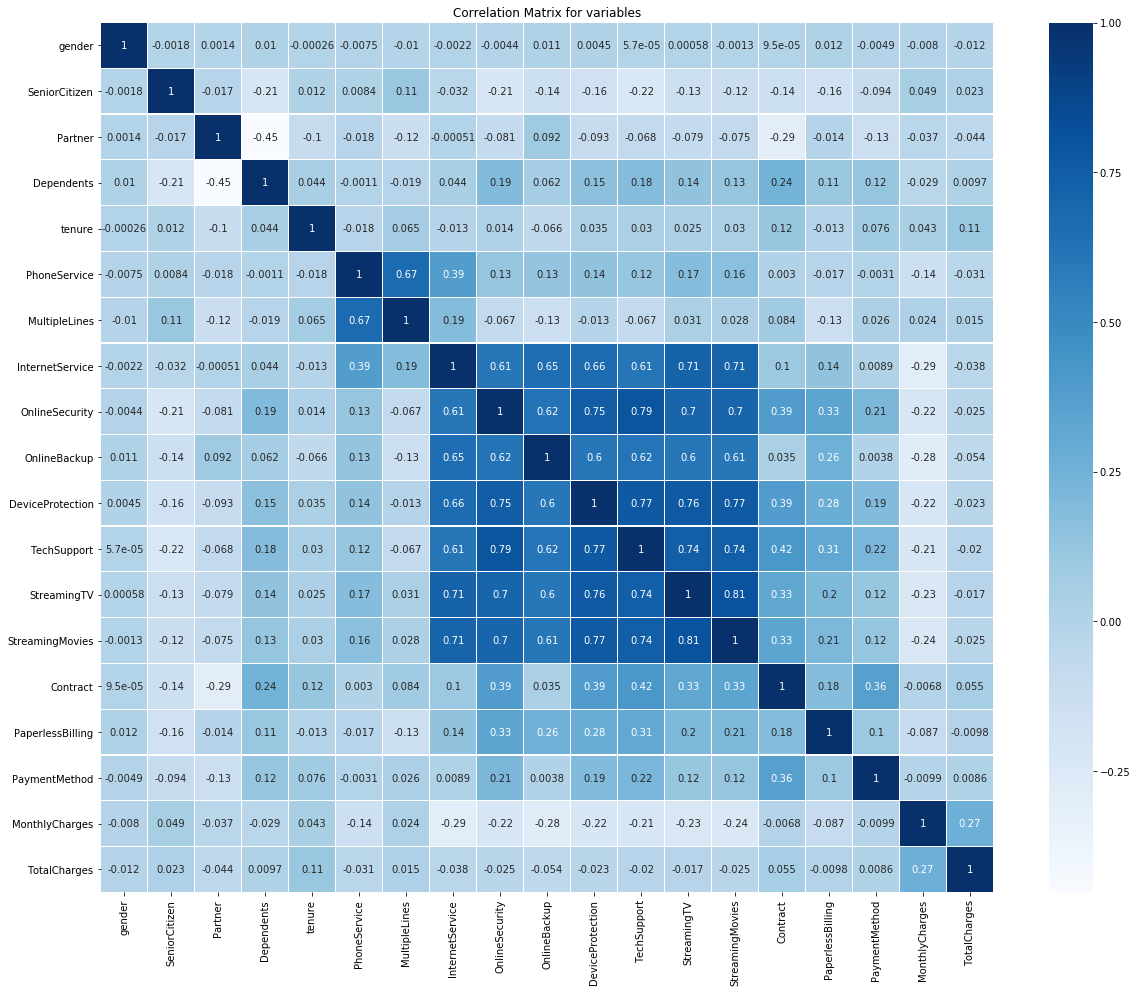

In [16]:
corr_Df = corr_Df.corr()
plt.figure(figsize=(20,16))
ax = sns.heatmap(corr_Df, xticklabels=corr_Df.columns, yticklabels=corr_Df.columns, 
                 linewidths=0.2, cmap="Blues",annot=True)
plt.title("Correlation Matrix for variables")

C:\Users\POPO\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Correlations Feature Importances for Churn')

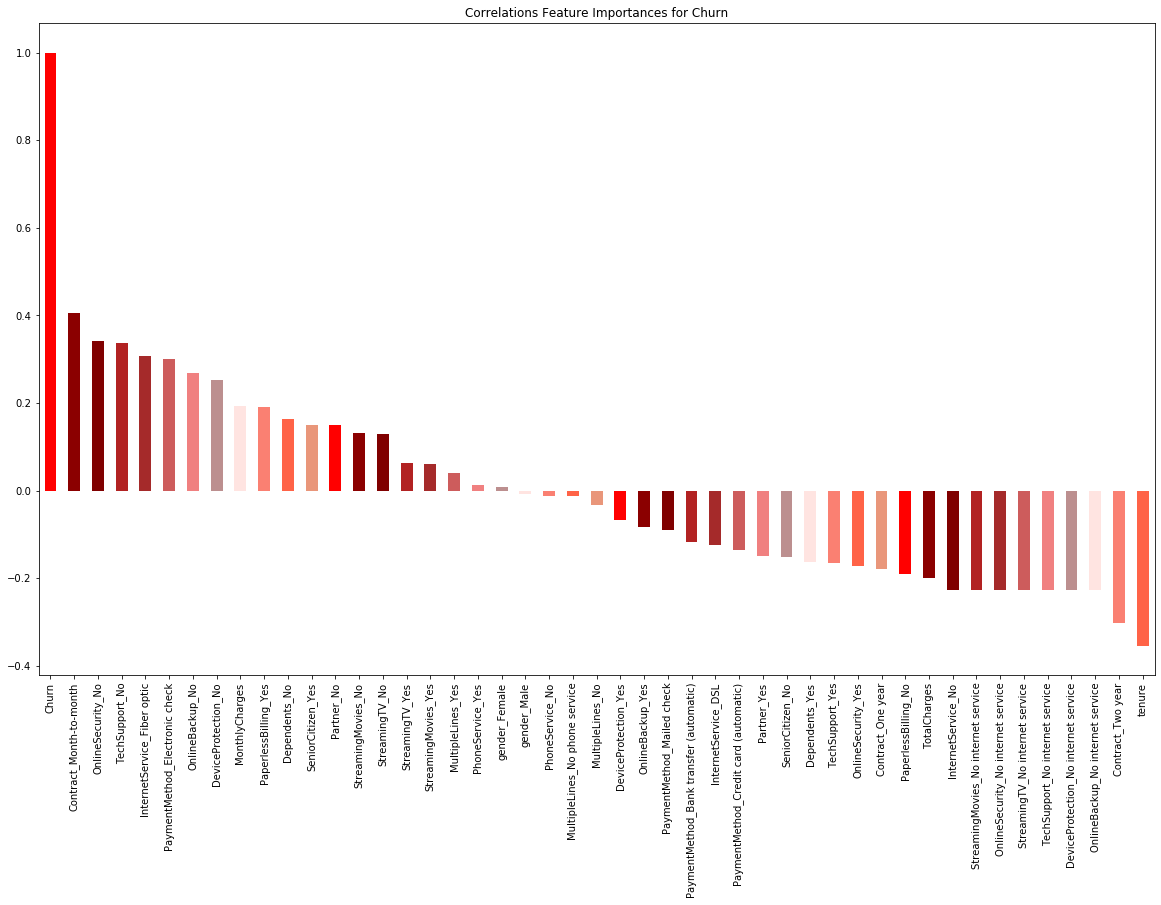

In [17]:
telcom_dummies = pd.get_dummies(telcom.iloc[:,1:21])
telcom_dummies.head()

# 自訂顏色
redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']

# 用戶流失(Churn)與各項變數(variables)相關圖
plt.figure(figsize=(20,12))
telcom_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for Churn")

Text(0.5, 1.0, 'Contract type distribution in customer attrition')

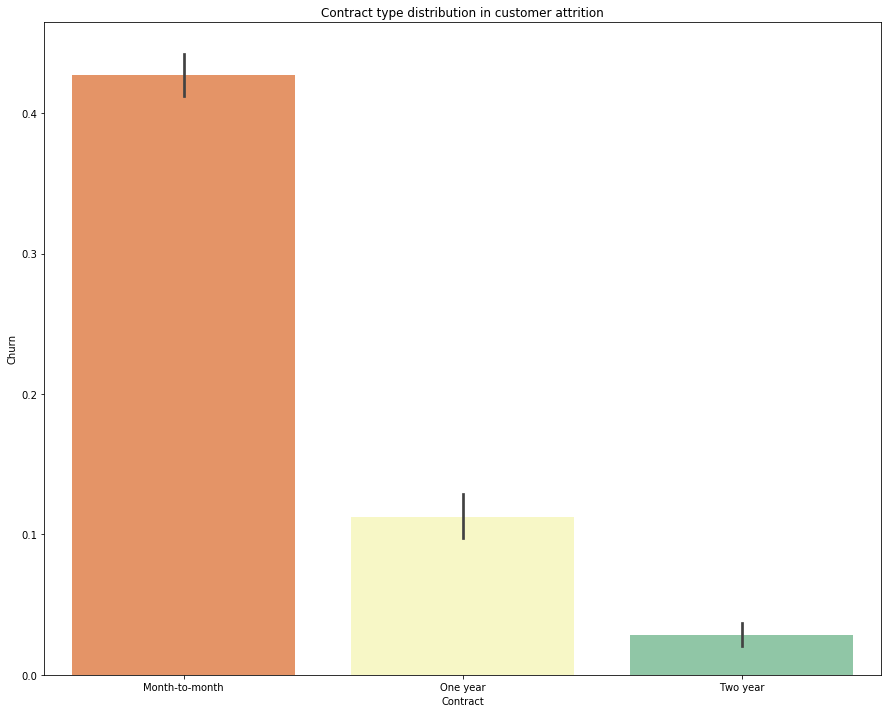

In [18]:
### 3–6.合約類型

plt.figure(figsize=(15,12))
sns.barplot(x="Contract",y="Churn", data=telcom,palette="Spectral", order= ['Month-to-month', 'One year', 'Two year'])
plt.title("Contract type distribution in customer attrition")

In [22]:
for i in telcom['Contract'].drop_duplicates():
    churn = telcom.groupby('Contract').get_group(i)
    churn = pd.DataFrame(churn,columns=['Contract','Churn'])
    churn_rate = churn['Churn'].value_counts()[1]/churn['Churn'].value_counts().sum()
    print('\t',churn['Contract'].values[0],'：',round(churn_rate*100,3),'\n\t')

	 Month-to-month ： 42.71 
	
	 One year ： 11.277 
	
	 Two year ： 2.849 
	


In [ ]:
### 3–7.支付方式

plt.figure(figsize=(15,12))
sns.barplot(x="PaymentMethod",y="Churn", data=telcom, palette="OrRd", order= ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check','Mailed check'])
plt.title("PaymentMethod type distribution in customer attrition")

In [ ]:
for i in telcom['PaymentMethod'].drop_duplicates():
    churn = telcom.groupby('PaymentMethod').get_group(i)
    churn = pd.DataFrame(churn,columns=['PaymentMethod','Churn'])
    churn_rate = churn['Churn'].value_counts()[1]/churn['Churn'].value_counts().sum()
    print('\t',churn['PaymentMethod'].values[0],'：',round(churn_rate*100,3),'\n\t')